<a href="https://colab.research.google.com/github/Yoyo1505/Noriega-Zaldiavr-Jorge-Armando_INV_OPS/blob/main/Tablero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Calculo de probabilidades.**

 *ANÁLISIS DE UNA CADENA DE MARKOV DE 4 ESTADOS*

Este codigo modela un sistema de cuatro sectores *(x, y, z, t)* como una Cadena de Markov. El objetivo es determinar si, después de un largo período, la probabilidad de encontrarse en cualquiera de los sectores, del circulo de colores, es la misma.

Primero modelamos la cadena de Markov usando las librerias de numpy, matplotlib y Networkx para calcular mediante simulación las probabilidades y visualizar las transiciones.

In [ ]:
# Se importan las herramientas necesarias para el análisis numérico y la visualización.
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#Planteamiento del problema

*Cadena de Markov*

Una Cadena de Markov es un modelo matemático que describe una secuencia de eventos
en la que la probabilidad de cada evento depende únicamente del estado del evento anterior.
Esta propiedad se conoce como "pérdida de memoria".

La dinámica del sistema se rige por la ecuación:
   $\pi_n = P \cdot \pi_{n-1}$

Donde:

- $π_n$: Es el vector de probabilidades de los estados en el tiempo $n$.
- P: Es la matriz de transición estocástica. Sus columnas deben sumar 1.
- $P[ j, i ]$: Representa la probabilidad de transitar del estado $i$ al estado $j$.

Ahora introducimos un arreglo para la matriz de transición.

In [ ]:
# Se define la matriz de transición 'P' del problema.
P = np.array([
    [1/4, 0,   1/4, 2/4],  # Fila 0: Probabilidades de llegar a 'x' (desde x, y, z, t)
    [2/4, 1/4, 0,   1/4],  # Fila 1: Probabilidades de llegar a 'y' (desde x, y, z, t)
    [1/4, 2/4, 1/4, 0  ],  # Fila 2: Probabilidades de llegar a 'z' (desde x, y, z, t)
    [0,   1/4, 2/4, 1/4]   # Fila 3: Probabilidades de llegar a 't' (desde x, y, z, t)
])

In [ ]:
# Se definen los nombres de los estados para usarlos en las gráficas y reportes.
estados = ['x', 'y', 'z', 't']
n_estados = len(estados)

*Visualización de la Cadena como un Grafo*

 Antes de calcular, es útil visualizar el sistema. Un grafo dirigido nos permite ver claramente qué estados se conectan entre sí y con qué probabilidad. Los nodos son los estados y las flechas (aristas) son las transiciones. Esto nos da una intuición inmediata de la estructura del problema.

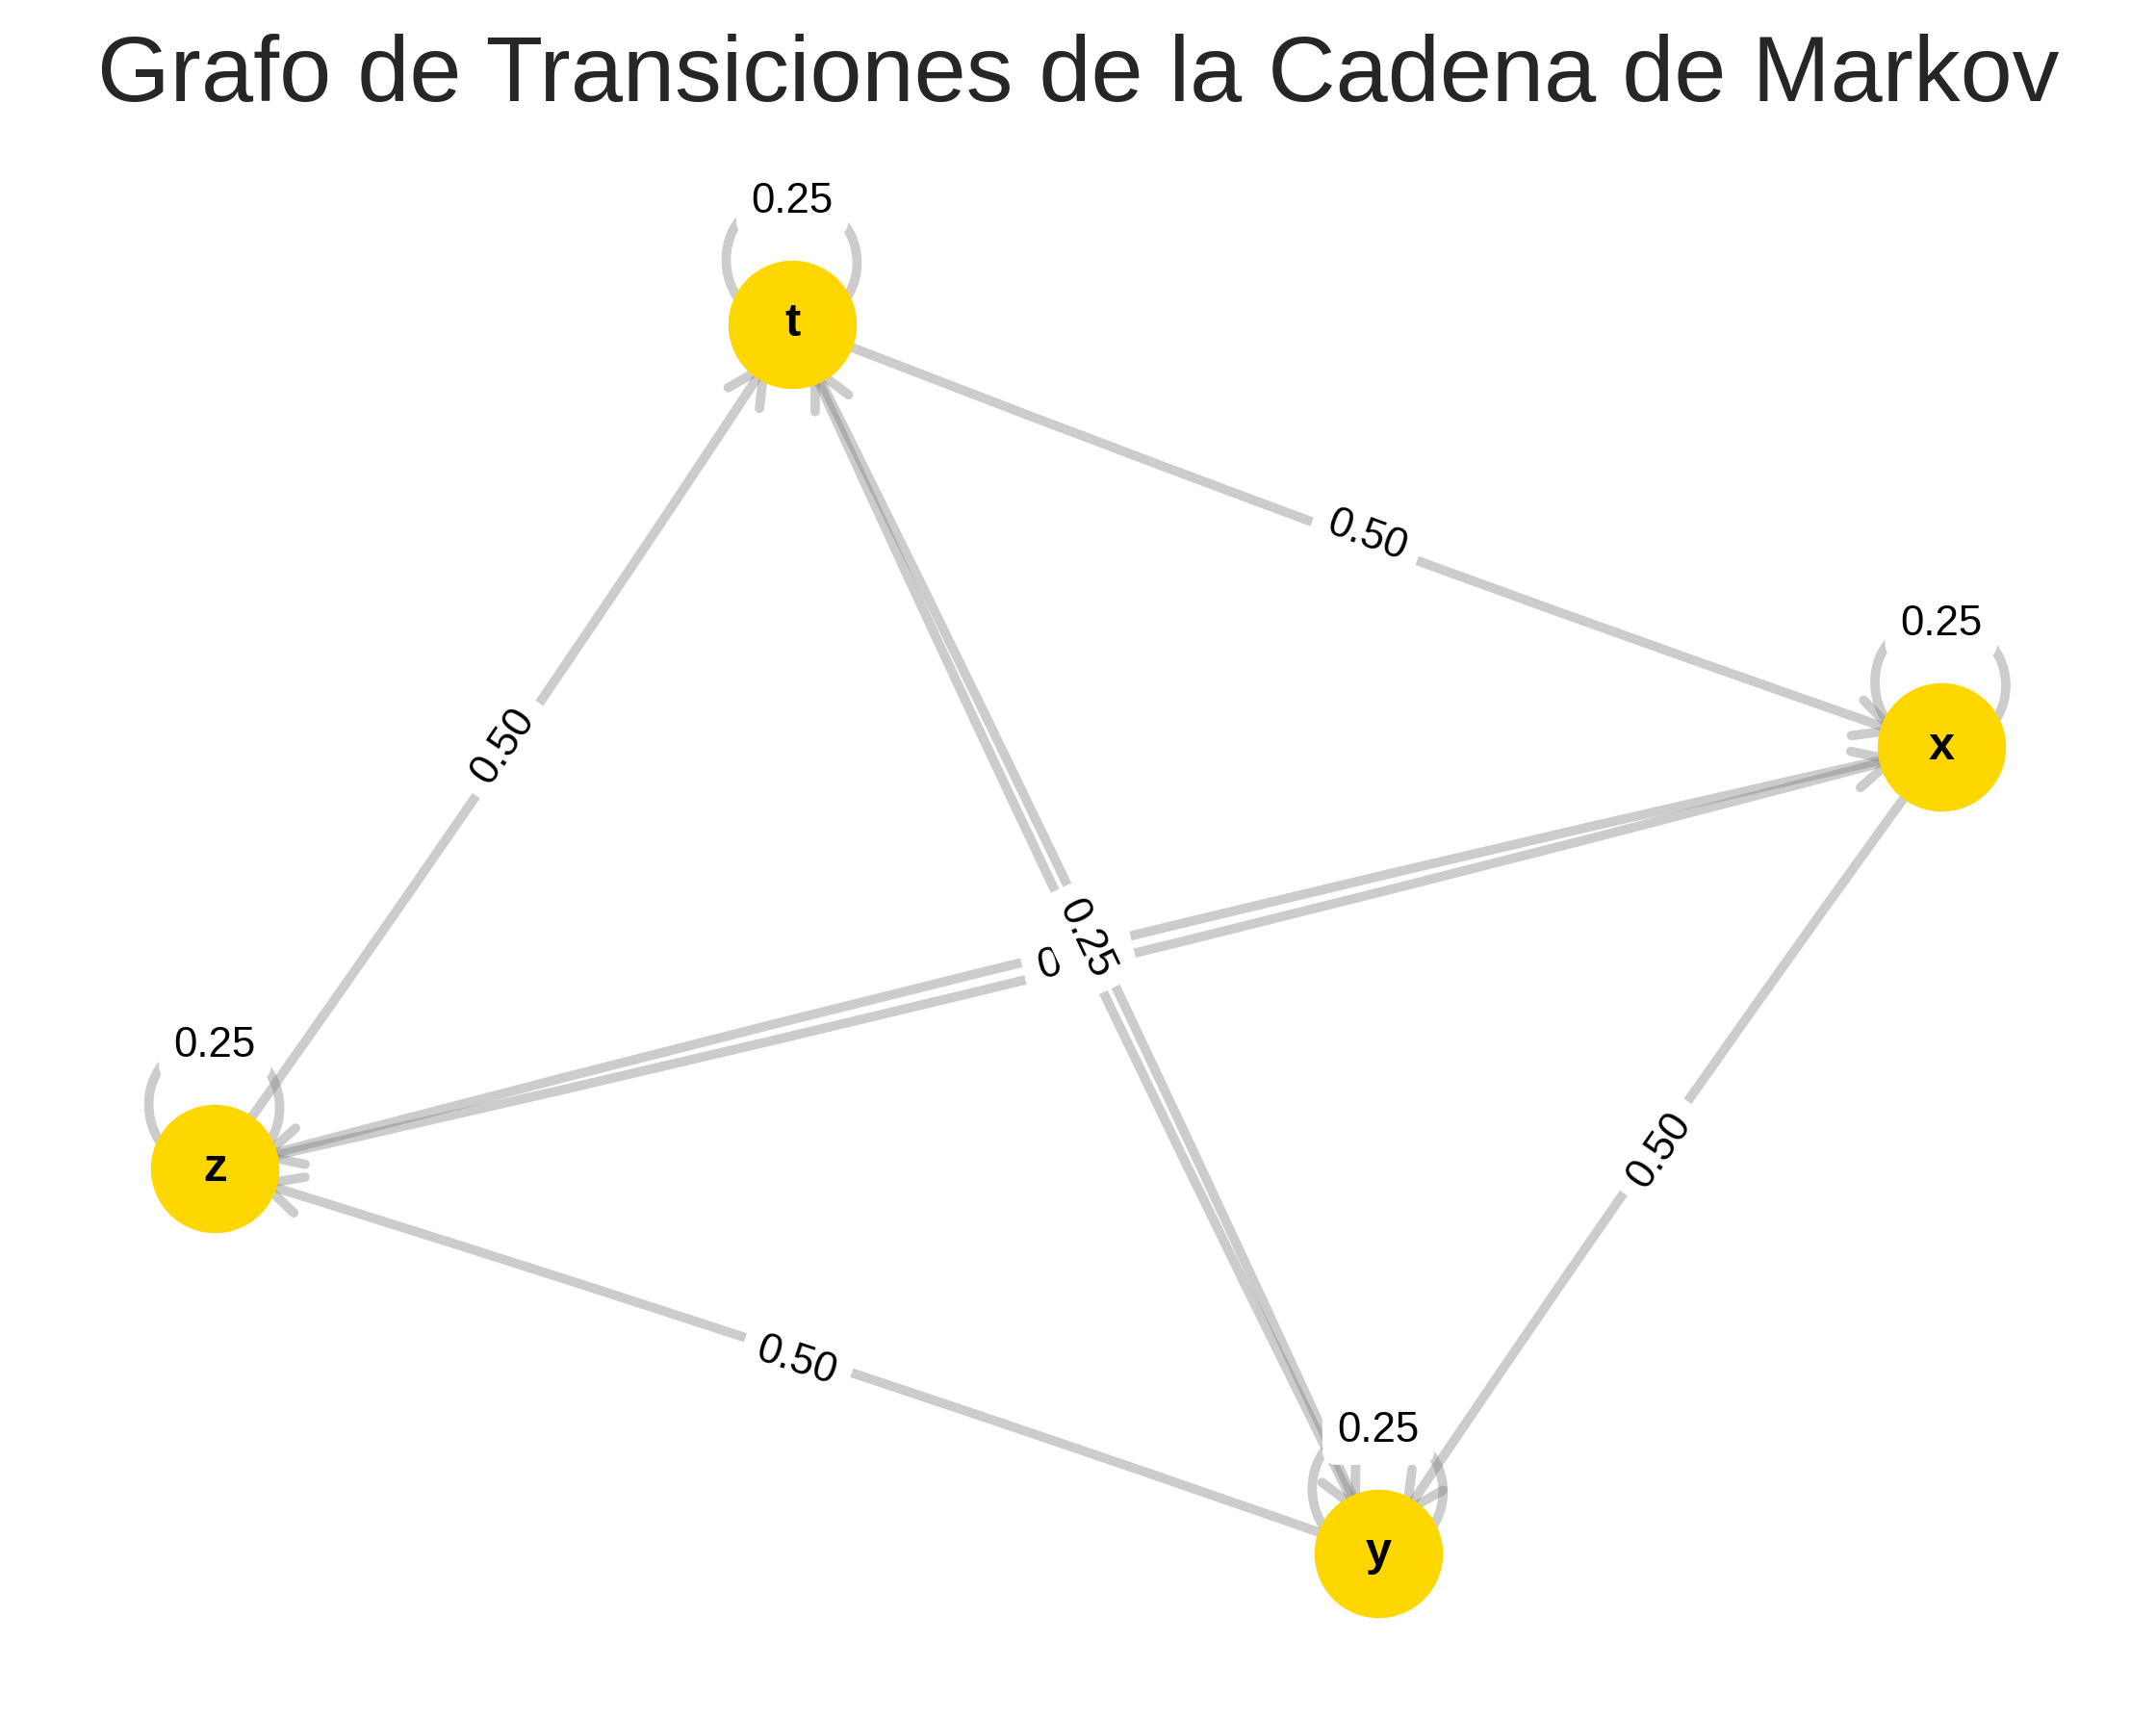

In [16]:
# Se crea un objeto Grafo Dirigido (DiGraph) de NetworkX.
G = nx.DiGraph()

# Se añaden los estados como nodos al grafo.
G.add_nodes_from(estados)

# Se recorre la matriz de transición para añadir las aristas (conexiones).
for i in range(n_estados):  # 'i' es el índice del estado de origen (columnas).
    for j in range(n_estados):  # 'j' es el índice del estado de destino (filas).
        probabilidad = P[j, i]

        # Solo se dibuja una arista si la transición es posible (probabilidad > 0).
        if probabilidad > 0:
            G.add_edge(estados[i], estados[j], weight=probabilidad)

# Se prepara la visualización del grafo.
plt.figure(figsize=(8, 6),dpi=350)
pos = nx.spring_layout(G, seed=42, k=1.5)

# Se extraen las probabilidades para usarlas como etiquetas en las aristas.
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}

# Se dibujan todos los componentes del grafo con estilos personalizados.
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='gold')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.4, edge_color='gray', arrowstyle='->', arrowsize=20, connectionstyle='arc3,rad=0.01')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=9)

plt.title('Grafo de Transiciones de la Cadena de Markov', fontsize=20)
plt.axis('off')
plt.show()

In [17]:
# Se define un estado inicial pi_0. Asumimos 100% de probabilidad en 'x'.
pi_n = np.array([1.0, 0.0, 0.0, 0.0])

# Se define el número de pasos para la simulación.
n_pasos = 20

# Se crea una lista para guardar el historial de probabilidades en cada paso.
historial_probabilidades = [pi_n]

# Bucle principal de la simulación.
for n in range(n_pasos):
    # Se aplica la ecuación fundamental: pi_{n+1} = P * pi_n
    pi_n = P @ pi_n
    historial_probabilidades.append(pi_n)

# Se convierte la lista a una matriz de numpy y se transpone para facilitar el ploteo.
# Cada fila contendrá ahora la historia de un único estado.
historial_probabilidades = np.array(historial_probabilidades).T

*ANÁLISIS DE RESULTADOS Y GRÁFICA DE CONVERGENCIA*

El resultado de la simulación es un vector de probabilidades que ya no cambia, conocido como la distribución estacionaria. Este vector nos dice cuál es la probabilidad de estar en cada sector después de que el sistema se ha estabilizado.


*VISUALIZACIÓN DE LA CONVERGENCIA*

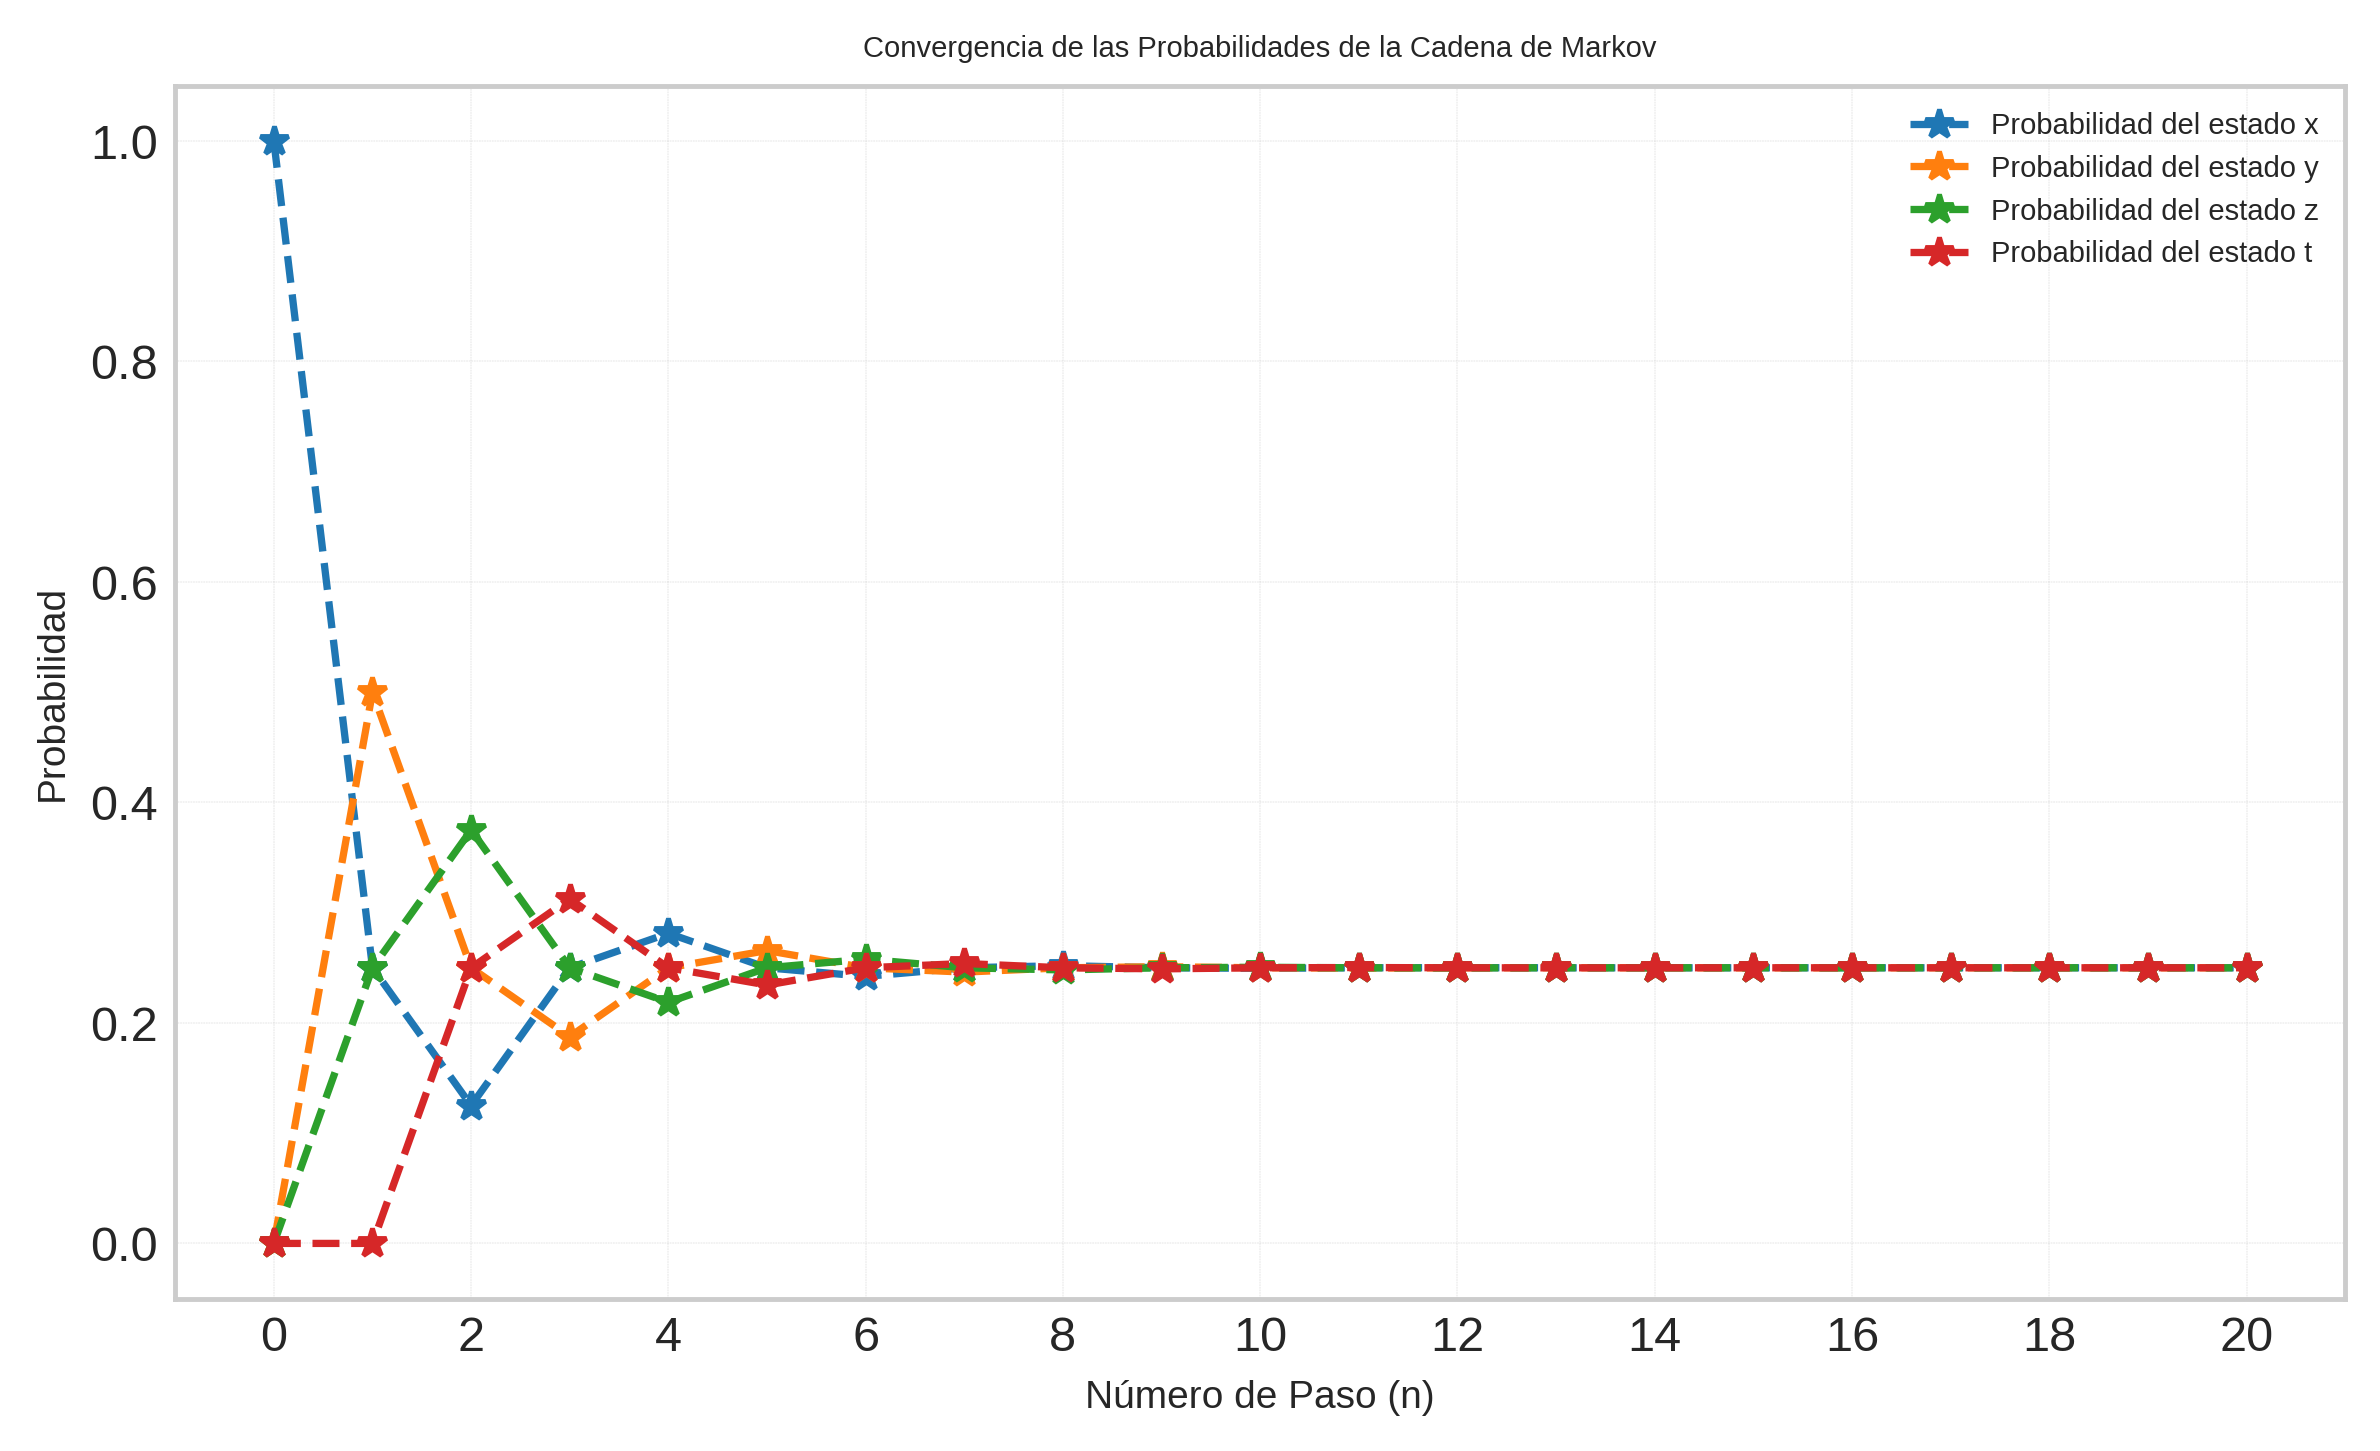


Análisis completado.


In [27]:
# Finalmente, se grafica la evolución de las probabilidades para ver visualmente cómo el sistema alcanza el equilibrio.
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 4.5),dpi=350)

# Se grafica la historia de cada estado.
for i, estado in enumerate(estados):
    plt.plot(range(n_pasos + 1), historial_probabilidades[i], marker='*', linestyle='--', label=f'Probabilidad del estado {estado}')

plt.title('Convergencia de las Probabilidades de la Cadena de Markov', fontsize=6)
plt.xlabel('Número de Paso (n)', fontsize=8)
plt.ylabel('Probabilidad', fontsize=8)
plt.xticks(range(0, n_pasos + 1, 2))
plt.legend(fontsize=6, loc='best')
plt.grid(True, which='both', linestyle='--', linewidth=0.1)
plt.show()